# Fake Data Creation

In case someone wants to simulate an experiment or has yet to procure actual data, There are two methods in the module that exist to create fake data. These methods are make_fake_data_system_noise and make_fake_data_system_slope. This notebook will show these methods off.

First, before we show these methods off, we have to do the imports and actually create the TableDictionarySystem.

In [1]:
from MachineLearningModule import *
import pandas as pd
from ipywidgets import interact
table = pd.read_csv("Combined_Two_Port_Check_Standard.csv")
table_dictionary_system = split_table_by_columns(table, "Device_Id", "System_Id","Measurement_Date")

C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,11,12,16,18,19,20,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Now we use the multiple_edits method to do multiple operations on the TableDictionarySystem. If you do not know how to use that method, check [Here.](Multiple_Edits Showoff Notebook.ipynb)

In [2]:
table_dictionary_system.multiple_edits(remove_column_duplicates={"column":"Frequency"},
                                       remove_short_tables={"row_count":10},
                                       keep_only_certain_columns={"columns":("Frequency","magS11","magS21","magS22")})

Next, we convert the TableDictionarySystem to an ArrayDictionarySystem and then interpolate it.

In [3]:
array_dictionary_system = table_dictionary_system.convert_to_array_dictionary_system()
array_dictionary_system.interpolate_data(50,"Frequency",["magS11","magS21","magS22"])

It is now time to create the fake data. The make_fake_data_system_noise method adds fake data by adding gaussian noise to every single point on a piece of real data, and keeps doing this until a desired amount of datasets are reached. The arguments are as follows:

independent_var: The name of the independent variable of the dataset. This will not have random noise added to it to create fake datasets.

dependent_vars: An iterable containing the names of the dependent variables in the dataset. Each one of these will have random noise applied to them to create fake datasets.

num_datasets: The amount of fake datasets to create.

location: The location to make fake data. More information on this can be found [Here.](Module Showoff Notebook.ipynb)

randomness_amplitudes: A list containing the random gaussian noise amplitudes to be added to the lines for each variable. The noise is gaussian noise, so around a third of the random values will go above this value.

The method returns a new ArrayDictionarySystem containing the fake data instead of the original data.

In [4]:
noisy_fake_data_system = array_dictionary_system.make_fake_data_system_noise("Frequency",
                                                                             ["magS11","magS21","magS22"],
                                                                             50,
                                                                             ["CTN210","System 2,7"],
                                                                             [0.003,0.0001,0.001])

Another method to create fake data is the make_fake_data_system_slope method. This adds a random value to the first point of an existing dataset using the np.random.normal method, then adds random deviations to the slope after each point. The arguments are as follows:

independent_var: The name of the independent variable of the dataset. This will not be modified to create fake datasets.

dependent_vars: An iterable containing the names of the dependent variables in the dataset. Each one of these will have random noise applied to their slopes and first values to make fake datasets.

num_datasets: The amount of fake datasets to create.

location: The location to make fake data. The variable is in the same format and exists for the same purpose as the make_fake_data_system_noise method, so the values inputted will have to be of a similar format.

starting_noises: A list containing the random gaussian noise amplitudes to be added to the first values of every line for each variable.

slope_deviations: A list containing the random gaussian noise amplitudes to added to the slopes of every line segment of every line for each variable.

smoothing_fracs: A list containing the amount of smoothing to be done for the lines of each variable. Don't overdo this, a smoothing frac of 0.1 is quite a lot.

In [5]:
smooth_fake_data_system = array_dictionary_system.make_fake_data_system_slope("Frequency",
                                                                              ["magS11","magS21","magS22"],
                                                                              50,
                                                                              ["CTN210","System 2,7"],
                                                                              [0.00111,0.0001,0.00222],
                                                                              [0.00220,0.00015,0.00441],
                                                                              [0.1,0.08,0.1])

Now it is time to get our actual arrays of data to be plotted! Since frequency stays the same among all of these datasets, it will only be gotten once:

In [6]:
frequency_vals=noisy_fake_data_system.get_dataset_variable_values("Frequency")

The rest of these arrays can be defined seperately:

In [7]:
#Noisy
noisy_magS11_vals = noisy_fake_data_system.get_dataset_variable_values("magS11")
noisy_magS21_vals = noisy_fake_data_system.get_dataset_variable_values("magS21")
noisy_magS22_vals = noisy_fake_data_system.get_dataset_variable_values("magS22")
#Smooth
smooth_magS11_vals = smooth_fake_data_system.get_dataset_variable_values("magS11")
smooth_magS21_vals = smooth_fake_data_system.get_dataset_variable_values("magS21")
smooth_magS22_vals = smooth_fake_data_system.get_dataset_variable_values("magS22")

When plotted, it can easily be seen that the make_fake_data_system_noise method creates especially noisy data; This can be used for inherently noisy datasets.

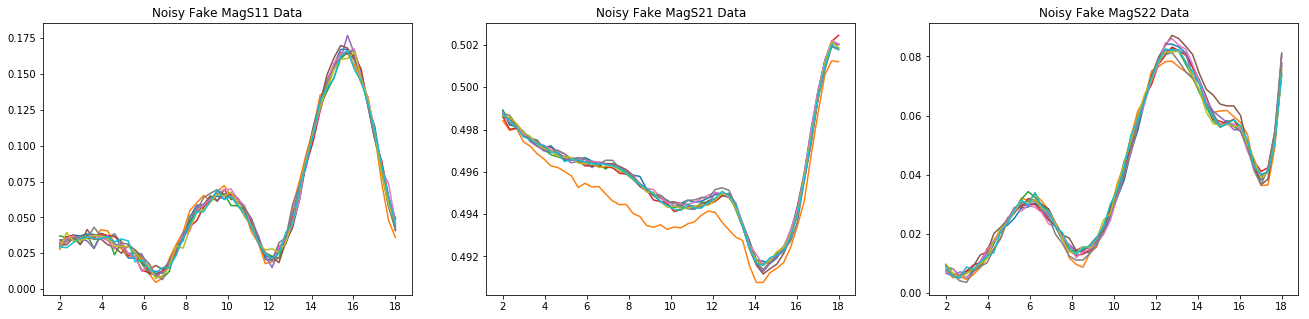

In [8]:
plt.figure(figsize=(22.5,5))
plt.subplot(1,3,1)
plt.title("Noisy Fake MagS11 Data")
plot_variable_array(frequency_vals,noisy_magS11_vals,num_lines=10)
plt.subplot(1,3,2)
plt.title("Noisy Fake MagS21 Data")
plot_variable_array(frequency_vals,noisy_magS21_vals,num_lines=10)
plt.subplot(1,3,3)
plt.title("Noisy Fake MagS22 Data")
plot_variable_array(frequency_vals,noisy_magS22_vals,num_lines=10)
plt.show()

Also, it is pretty clear that make_fake_data_system_slope produces smoother lines for it's fake data, which is perfect for relatively smooth original data.

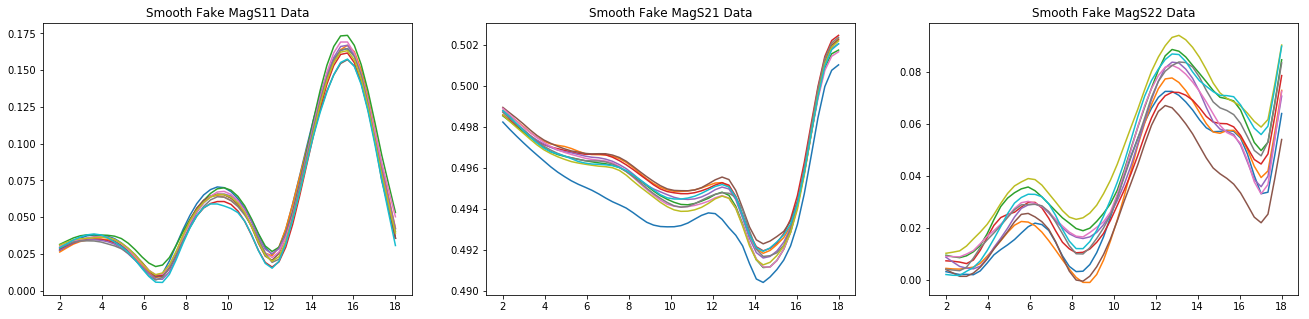

In [9]:
plt.figure(figsize=(22.5,5))
plt.subplot(1,3,1)
plt.title("Smooth Fake MagS11 Data")
plot_variable_array(frequency_vals,smooth_magS11_vals,num_lines=10)
plt.subplot(1,3,2)
plt.title("Smooth Fake MagS21 Data")
plot_variable_array(frequency_vals,smooth_magS21_vals,num_lines=10)
plt.subplot(1,3,3)
plt.title("Smooth Fake MagS22 Data")
plot_variable_array(frequency_vals,smooth_magS22_vals,num_lines=10)
plt.show()

One person may ask, though, "How do I get good values for the parameters for the fake data system creation methods?" This is no simple question, however one way to do it is to create a method which creates a fake data system and plots values, like this:

In [10]:
def graph_smooth_data_with_parameters(variable,num_points, starting_deviation, slope_deviation, smoothing_frac):
    method_fake_data_system = array_dictionary_system.make_fake_data_system_slope("Frequency",
                                                                                  [variable],
                                                                                  num_points,
                                                                                  ["CTN210","System 2,7"],
                                                                                  [starting_deviation/1000.0],
                                                                                  [slope_deviation/1000.0],
                                                                                  [smoothing_frac])
    method_frequency_vals=method_fake_data_system.get_dataset_variable_values("Frequency")
    method_magS21_vals=method_fake_data_system.get_dataset_variable_values(variable)
    plot_variable_array(method_frequency_vals,method_magS21_vals,num_lines="all")
    plt.show()

...And then use the ipywidgets interact method to be able to tweak fake data to your liking:

In [11]:
interact(graph_smooth_data_with_parameters,
         variable=["magS11","magS21","magS22"],
         num_points=(1,100,1),
         starting_deviation=(0.01,5,0.01),
         slope_deviation=(0.01,10,0.01),
         smoothing_frac=(0.001,0.1,0.001))

<function __main__.graph_smooth_data_with_parameters>